<a href="https://colab.research.google.com/github/joseph-tech-dev/machine-learning/blob/main/Housingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns



---



In [3]:
# Reading the Boston housing dataset
df = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/20240522145850/housing%5B1%5D.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
# Dataset cleaning
df_cleaned = df.dropna()
df_cleaned

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [38]:
#Importing liabraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [19]:
# Defining features(X) and Target varibleas (Y)
X = df_cleaned.drop(['ocean_proximity','median_house_value'], axis=1)
Y = df_cleaned['median_house_value']

In [20]:
# Spliting dataset for the data train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
# Fitting data in the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [25]:
# Linear function coefficients
model_coef = model.coef_
model_coef

array([-4.25467060e+04, -4.23360430e+04,  1.15509711e+03, -8.44041848e+00,
        1.15830375e+02, -3.67587673e+01,  4.16404344e+01,  4.02932784e+04])

In [29]:
# Predicting values
model.predict(x_test)

array([197058.03752153, 157508.79088918, 202099.26270386, ...,
       131098.67538845, 155468.78077784, 166363.59962367])

In [30]:
# Printing Coefficients and the intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-4.25467060e+04 -4.23360430e+04  1.15509711e+03 -8.44041848e+00
  1.15830375e+02 -3.67587673e+01  4.16404344e+01  4.02932784e+04]
Intercept: -3569674.5266952454


In [39]:
# Evaluating the model using Mean Squared error
print("MSE:", mean_squared_error(y_test, y_pred)) # Mean Squared Error
print("RMSE:", root_mean_squared_error(y_test, y_pred)) #  How far my predictions are from the actual values
print("MAE:", mean_absolute_error(y_test, y_pred)) # Mean Absolute Error
print("R²:", r2_score(y_test, y_pred))


MSE: 4921881237.628168
RMSE: 70156.120457364
MAE: 51372.67217050068
R²: 0.640086568899372


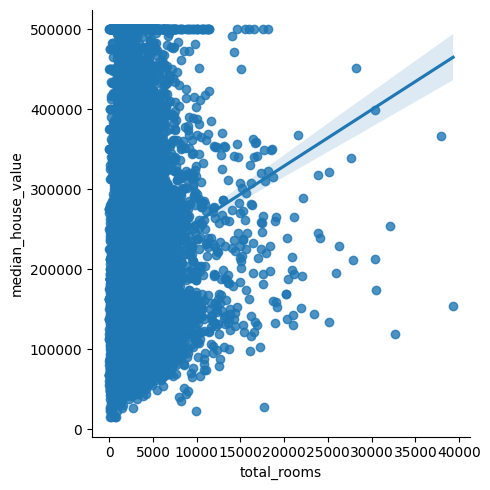

In [42]:
sns.lmplot(x='total_rooms', y='median_house_value', data=df_cleaned)